In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
housingInfo = pd.read_csv('I://Syed//IITB-Study Material//housingproject//train.csv')
housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# inspect housingInfo dataframe

print("*********************************  Info *******************************************") 
print(housingInfo.info())
print("*********************************  Shape ******************************************") 
print(housingInfo.shape)
print("**************************** Columns having null values *****************************")
print(housingInfo.isnull().any())
print("**************************** Describe *****************************")
housingInfo.describe()

# Data Cleaning

In [12]:
# check for null values in all categorical columns

housingInfo.select_dtypes(include='object').isnull().sum()[housingInfo.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
# Replace NA with None in the following columns below : 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    housingInfo[col]=housingInfo[col].fillna('None')

# Remove categorical attributes

In [14]:
# Drop the following columns which has 85% values associated to a specific value

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = housingInfo.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(housingInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# From skewed data removing the column

housingInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [15]:
# double check is there any null values in all categorical columns
housingInfo.select_dtypes(include='object').isnull().sum()[housingInfo.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

# From Numerical attributes removing null values

In [16]:
housingInfo.select_dtypes(include=['int64','float']).isnull().sum()[housingInfo.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [17]:
# Impute the null values with median values 

housingInfo['LotFrontage'] = housingInfo['LotFrontage'].replace(np.nan, housingInfo['LotFrontage'].median())
housingInfo['MasVnrArea'] = housingInfo['MasVnrArea'].replace(np.nan, housingInfo['MasVnrArea'].median())

In [18]:
# Setting the null values with 0 

housingInfo['GarageYrBlt']=housingInfo['GarageYrBlt'].fillna(0)
housingInfo['GarageYrBlt'] = housingInfo['GarageYrBlt'].astype(int)

In [19]:
# Create a new column named Is renovate - This column would determine whether the house has been renovate or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
housingInfo['IsRemodelled'] = housingInfo.apply(checkForRemodel, axis=1)
housingInfo.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [20]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
housingInfo['BuiltOrRemodelAge'] = housingInfo.apply(getBuiltOrRemodelAge, axis=1)
housingInfo.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [21]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
housingInfo['OldOrNewGarage'] = housingInfo['GarageYrBlt'].apply(getGarageConstructionPeriod)
housingInfo.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [22]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

housingInfo.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

# Remove numerical attributes that have more than 85%

In [23]:
# Drop the following columns that have more than 85% 
# We will also drop MoSold ,since we are not using for further anal

def getHighNumericalValueCounts():
    column = []
    numerical_columns = housingInfo.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(housingInfo[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
housingInfo.drop(columnsToBeRemoved, axis = 1, inplace = True)

housingInfo.drop(['MoSold'], axis = 1, inplace = True)

housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [24]:
# check for percentage of null values in all column

percent_missing = round(100*(housingInfo.isnull().sum()/len(housingInfo.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


# Check for Duplicates

In [25]:
housingInfo[housingInfo.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


# Outlier Treatment

In [26]:
housingInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


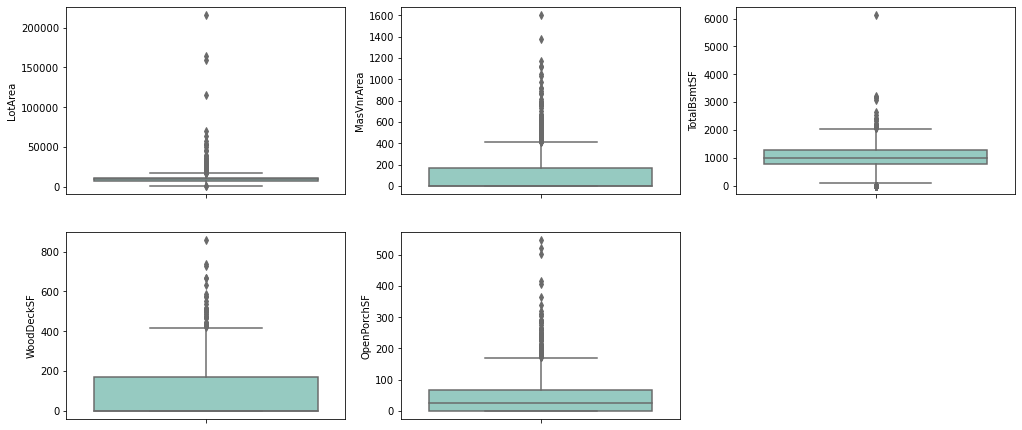

In [27]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housingInfo)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housingInfo)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housingInfo)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = housingInfo)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = housingInfo)
plt.show()

In [28]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = housingInfo['LotArea'].quantile(0.98)
housingInfo = housingInfo[housingInfo["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = housingInfo['MasVnrArea'].quantile(0.98)
housingInfo = housingInfo[housingInfo["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = housingInfo['TotalBsmtSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = housingInfo['WoodDeckSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = housingInfo['OpenPorchSF'].quantile(0.99)
housingInfo = housingInfo[housingInfo["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [29]:
# Determine the percentage of data retained

num_data = round(100*(len(housingInfo)/1460),2)
print(num_data)

93.01


# Data Visualization

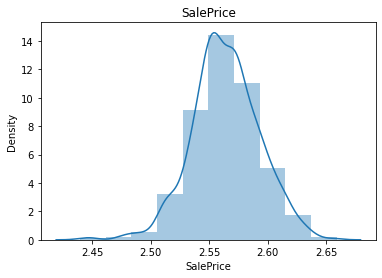

In [33]:
# Visualise the target variable -> SalePrice after transforming the sales price

housingInfo['SalePrice'] = np.log1p(housingInfo['SalePrice'])

plt.title('SalePrice')
sns.distplot(housingInfo['SalePrice'], bins=10)
plt.show()

<Figure size 720x360 with 0 Axes>

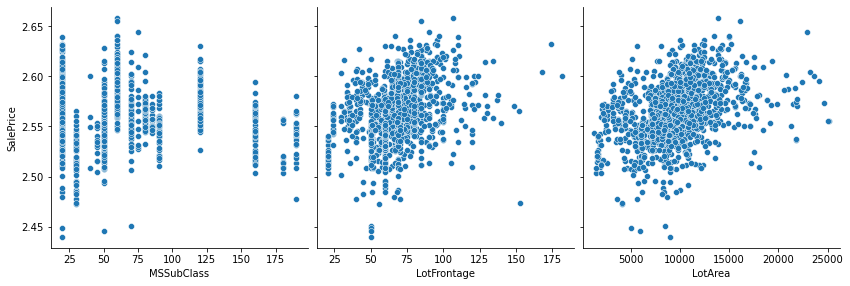

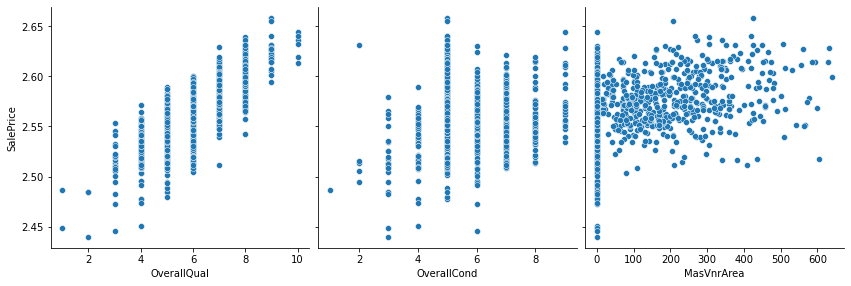

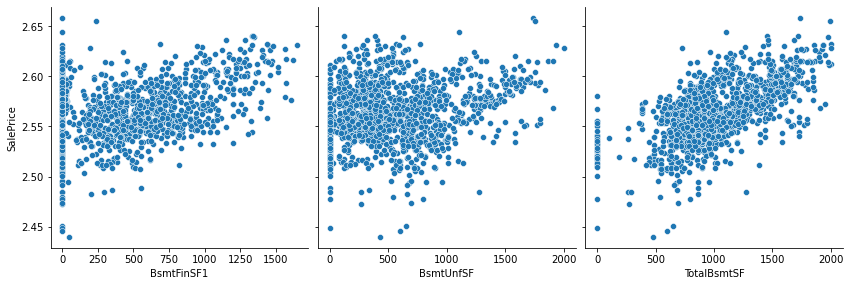

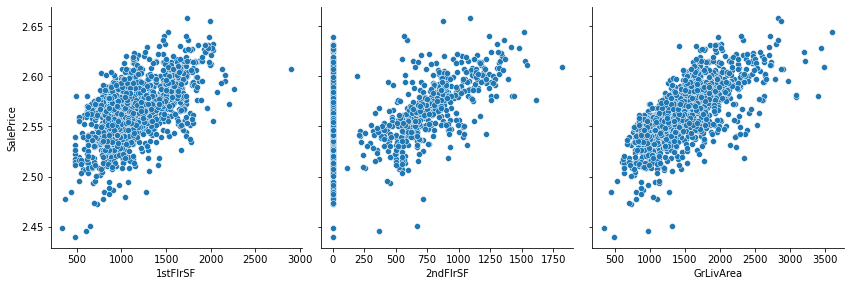

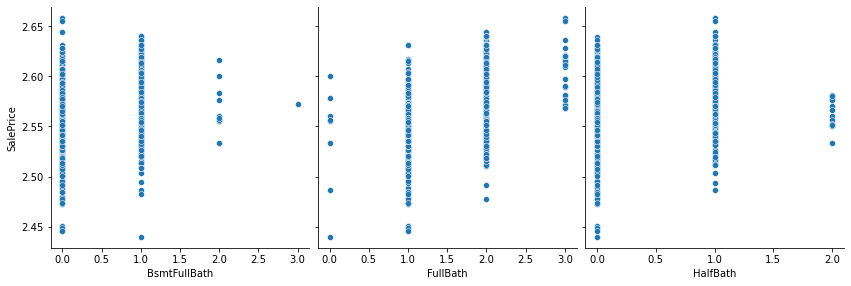

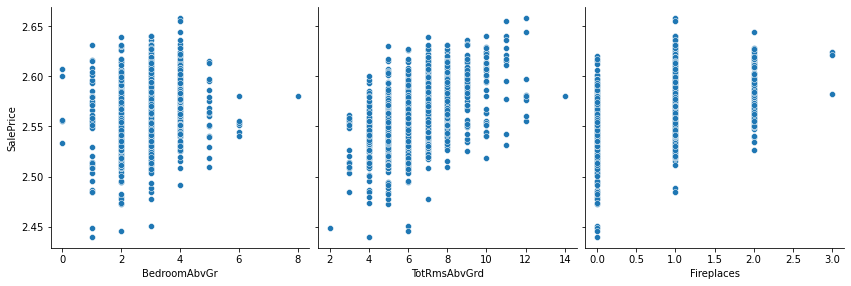

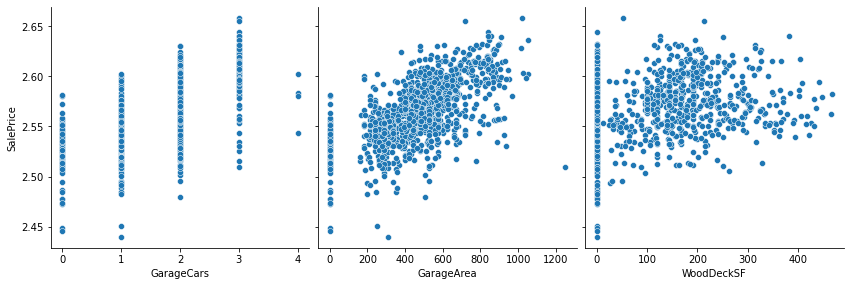

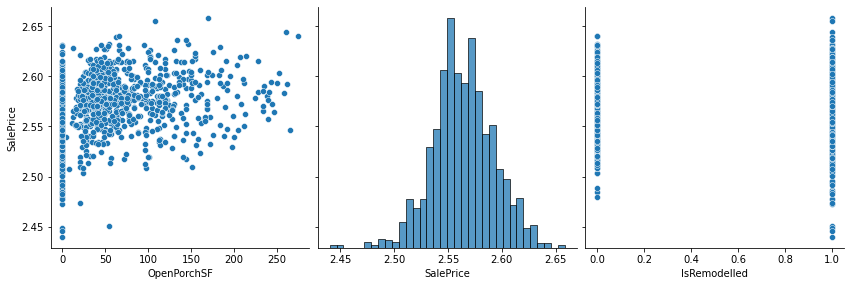

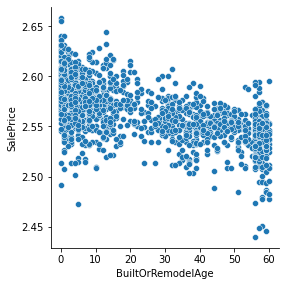

In [34]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(housingInfo, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingInfo, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingInfo, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingInfo, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingInfo, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingInfo, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingInfo, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingInfo, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(housingInfo, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

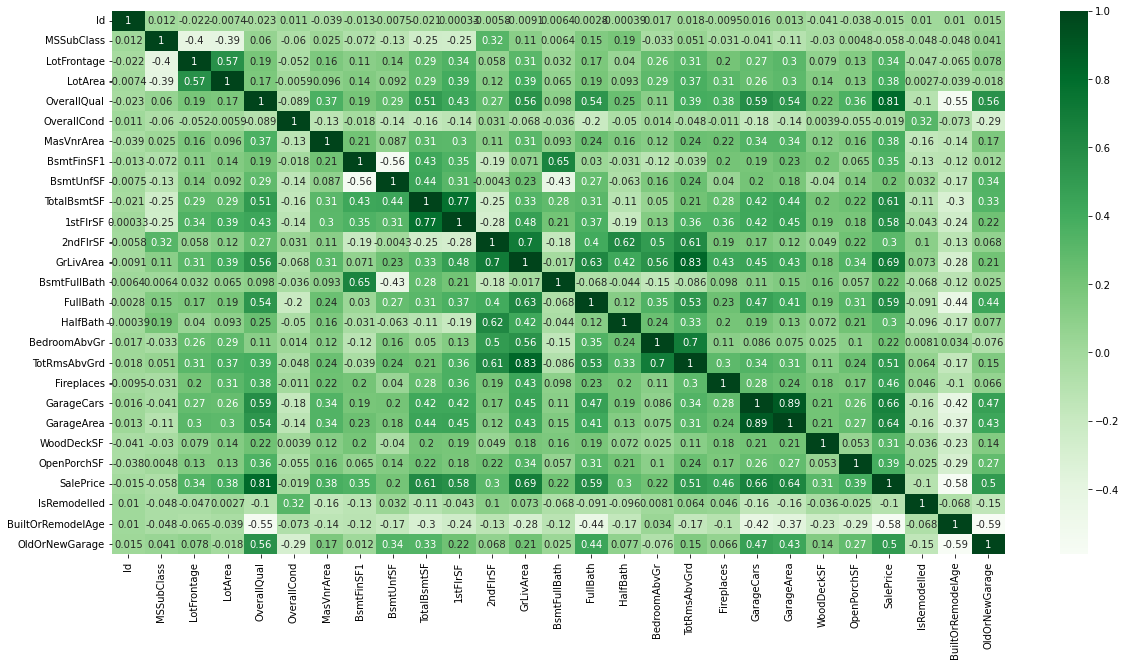

In [36]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(housingInfo.corr(), annot = True, cmap="Greens")
plt.show()

# Removing following columns which shows high correlation

In [37]:
# Removing the highly correlated variables

housingInfo.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [38]:
# Check the shape of the dataframe

housingInfo.shape

(1358, 47)

# Data Preparation

In [39]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence
housingInfo['d_LotShape'] = housingInfo['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housingInfo['d_ExterQual'] = housingInfo['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housingInfo['d_BsmtQual'] = housingInfo['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingInfo['d_BsmtExposure'] = housingInfo['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housingInfo['d_BsmtFinType1'] = housingInfo['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
housingInfo['d_HeatingQC'] = housingInfo['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingInfo['d_KitchenQual'] = housingInfo['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingInfo['d_FireplaceQu'] = housingInfo['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housingInfo['d_GarageFinish'] = housingInfo['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housingInfo['d_BldgType'] = housingInfo['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
housingInfo['d_HouseStyle'] = housingInfo['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
housingInfo['d_Fence'] = housingInfo['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
housingInfo['d_LotConfig'] = housingInfo['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
housingInfo['d_MasVnrType'] = housingInfo['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
housingInfo['d_SaleCondition'] = housingInfo['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
housingInfo.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [40]:
# We can also drop the id column as it will not be used any more

housingInfo = housingInfo.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

housingInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [41]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(housingInfo['MSZoning'], prefix='MSZoning', drop_first = True)
housingInfo = pd.concat([housingInfo, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(housingInfo['Neighborhood'], prefix='Neighborhood', drop_first = True)
housingInfo = pd.concat([housingInfo, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(housingInfo['RoofStyle'], prefix='RoofStyle', drop_first = True)
housingInfo = pd.concat([housingInfo, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(housingInfo['Exterior1st'], prefix='Exterior1st', drop_first = True)
housingInfo = pd.concat([housingInfo, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(housingInfo['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housingInfo = pd.concat([housingInfo, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(housingInfo['Foundation'], prefix='Foundation', drop_first = True)
housingInfo = pd.concat([housingInfo, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(housingInfo['GarageType'], prefix='GarageType', drop_first = True)
housingInfo = pd.concat([housingInfo, d_GarageType], axis = 1)

housingInfo.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [42]:
# drop the below columns as we now have new columns derived from these columns

housingInfo = housingInfo.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

housingInfo.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [43]:
housingInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


# Train Test Split

In [46]:
# Keeping all feature variable to X

X = housingInfo.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [47]:
# Keeping response variable to y

y = housingInfo['SalePrice']
y.head()

0    2.583824
1    2.573300
2    2.589054
3    2.553297
4    2.597433
Name: SalePrice, dtype: float64

In [48]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [65]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

# Recursive feature elimination

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=100)         
rfe = rfe.fit(X_train, y_train)

In [69]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotFrontage,True,1
2,LotArea,True,1
3,OverallQual,True,1
4,OverallCond,True,1
...,...,...,...
95,Foundation_Stone,True,1
96,GarageType_BuiltIn,True,1
97,GarageType_CarPort,True,1
98,GarageType_Detchd,True,1


In [70]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [71]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model Building and Evaluation

In [72]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,100,-0.006019,-0.006745,1
23,50,-0.005958,-0.006752,2
22,20,-0.005905,-0.006773,3
21,10.0,-0.005870,-0.006785,4
20,9.0,-0.005866,-0.006786,5
19,8.0,-0.005861,-0.006788,6
18,7.0,-0.005855,-0.006789,7
17,6.0,-0.005850,-0.006791,8
16,5.0,-0.005844,-0.006795,9
15,4.0,-0.005839,-0.006801,10


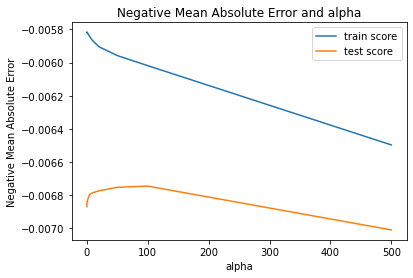

In [74]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=100)

In [76]:
# check the coefficient values with lambda = 10

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.83700204e-04, -8.18562831e-05,  1.98889302e-03,  4.83288722e-03,
        3.68748154e-03,  2.34523116e-04,  1.78207979e-03, -2.34012787e-04,
        3.92794656e-03,  1.71708746e-03,  1.55923998e-03,  5.63456708e-03,
        9.28245320e-04,  1.19046722e-03,  1.69990169e-03, -2.88775366e-04,
        1.09655252e-03,  2.17860220e-03,  7.54799306e-04,  4.73030747e-04,
       -9.51735131e-04, -1.52045825e-03,  1.07812920e-03,  6.81420740e-04,
        9.21960561e-04,  6.46679902e-04,  1.39221136e-03,  1.11038037e-03,
        5.98075986e-04,  7.41457402e-04, -1.03427903e-03,  8.31891420e-04,
        2.43429737e-04,  1.05233338e-03,  3.21471808e-03,  1.43114849e-03,
        5.31052488e-03,  4.12463455e-03, -1.37445399e-04, -6.18346511e-04,
       -4.91994048e-04,  1.30935081e-04, -3.71814981e-04,  1.60172307e-03,
       -1.48229374e-03, -6.48243929e-04, -1.21921682e-03, -1.20155500e-03,
       -4.76770539e-04, -8.53714280e-04,  2.34051727e-04, -8.90677616e-04,
        8.94800271e-05,  

In [77]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

8.493100665992529e-05

In [78]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0007
1,LotFrontage,-0.0001
2,LotArea,0.0020
3,OverallQual,0.0048
4,OverallCond,0.0037
...,...,...
95,Foundation_Stone,0.0005
96,GarageType_BuiltIn,0.0002
97,GarageType_CarPort,-0.0009
98,GarageType_Detchd,-0.0004


In [79]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0007,
 'LotFrontage': -0.0001,
 'LotArea': 0.002,
 'OverallQual': 0.0048,
 'OverallCond': 0.0037,
 'MasVnrArea': 0.0002,
 'BsmtFinSF1': 0.0018,
 'BsmtUnfSF': -0.0002,
 'TotalBsmtSF': 0.0039,
 '1stFlrSF': 0.0017,
 '2ndFlrSF': 0.0016,
 'GrLivArea': 0.0056,
 'BsmtFullBath': 0.0009,
 'FullBath': 0.0012,
 'HalfBath': 0.0017,
 'BedroomAbvGr': -0.0003,
 'Fireplaces': 0.0011,
 'GarageCars': 0.0022,
 'WoodDeckSF': 0.0008,
 'OpenPorchSF': 0.0005,
 'IsRemodelled': -0.001,
 'BuiltOrRemodelAge': -0.0015,
 'OldOrNewGarage': 0.0011,
 'd_BsmtQual': 0.0007,
 'd_BsmtExposure': 0.0009,
 'd_BsmtFinType1': 0.0006,
 'd_HeatingQC': 0.0014,
 'd_KitchenQual': 0.0011,
 'd_FireplaceQu': 0.0006,
 'd_GarageFinish': 0.0007,
 'd_BldgType': -0.001,
 'd_HouseStyle': 0.0008,
 'd_LotConfig': 0.0002,
 'd_SaleCondition': 0.0011,
 'MSZoning_FV': 0.0032,
 'MSZoning_RH': 0.0014,
 'MSZoning_RL': 0.0053,
 'MSZoning_RM': 0.0041,
 'Neighborhood_Blueste': -0.0001,
 'Neighborhood_BrDale': -0.0006,
 'Neighborhood_

In [81]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
#rfe = RFE(lm, 15)
rfe = RFE(estimator=lm, n_features_to_select=100)
rfe = rfe.fit(X_train_ridge, y_train)

In [82]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
11,GrLivArea,True,1,0.0056
36,MSZoning_RL,True,1,0.0053
3,OverallQual,True,1,0.0048
37,MSZoning_RM,True,1,0.0041
8,TotalBsmtSF,True,1,0.0039
4,OverallCond,True,1,0.0037
93,Foundation_PConc,True,1,0.0033
34,MSZoning_FV,True,1,0.0032
17,GarageCars,True,1,0.0022
2,LotArea,True,1,0.0020


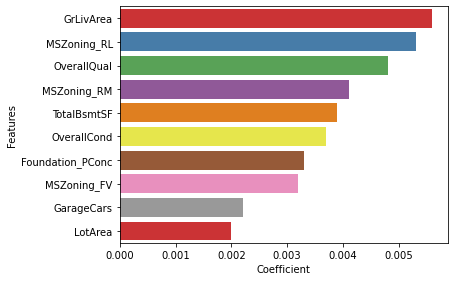

In [83]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

In [84]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.006097,-0.006760,1
2,0.0003,-0.006177,-0.006768,2
0,0.0001,-0.006015,-0.006779,3
3,0.0004,-0.006250,-0.006788,4
4,0.0005,-0.006326,-0.006827,5
5,0.001,-0.006794,-0.007152,6
6,0.002,-0.007518,-0.007724,7
7,0.003,-0.008167,-0.008298,8
8,0.004,-0.008884,-0.008998,9
9,0.005,-0.009724,-0.009839,10


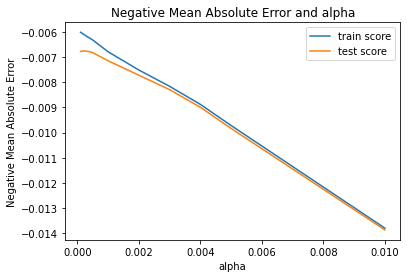

In [86]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [87]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [88]:
alpha = 0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-1.71017410e-04,  1.28048768e-04,  1.66593500e-03,  6.44001866e-03,
        3.00772540e-03,  6.77363496e-05,  2.57153895e-03, -0.00000000e+00,
        3.45216676e-03,  3.72475271e-04,  0.00000000e+00,  7.35231017e-03,
        3.76104232e-04,  4.41407179e-04,  1.13910061e-03,  0.00000000e+00,
        9.49694019e-04,  2.63036273e-03,  6.13597813e-04,  3.61757726e-04,
       -6.35414292e-04, -1.86916874e-03,  4.34017991e-04,  0.00000000e+00,
        9.02054075e-04,  4.46467940e-04,  1.28593932e-03,  1.30981707e-03,
        7.49875145e-04,  1.09129374e-03, -5.38576653e-04,  0.00000000e+00,
       -0.00000000e+00,  1.12407813e-03,  1.19664348e-03,  0.00000000e+00,
        1.35665943e-03, -0.00000000e+00, -0.00000000e+00, -1.04676816e-05,
       -0.00000000e+00,  3.88695498e-06,  0.00000000e+00,  1.42975602e-03,
       -5.88245410e-04, -0.00000000e+00, -9.22347029e-04, -4.00941948e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [89]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

8.216508991640028e-05

In [90]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0002
1,LotFrontage,0.0001
2,LotArea,0.0017
3,OverallQual,0.0064
4,OverallCond,0.0030
5,MasVnrArea,0.0001
6,BsmtFinSF1,0.0026
7,TotalBsmtSF,0.0035
8,1stFlrSF,0.0004
9,GrLivArea,0.0074


In [91]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.00017101741014934432,
 'LotFrontage': 0.00012804876788033459,
 'LotArea': 0.0016659349961768626,
 'OverallQual': 0.006440018659345793,
 'OverallCond': 0.0030077254046915166,
 'MasVnrArea': 6.773634960783719e-05,
 'BsmtFinSF1': 0.0025715389462183896,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.0034521667632023737,
 '1stFlrSF': 0.00037247527102287676,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.0073523101655067384,
 'BsmtFullBath': 0.00037610423234005517,
 'FullBath': 0.00044140717930959636,
 'HalfBath': 0.001139100612063758,
 'BedroomAbvGr': 0.0,
 'Fireplaces': 0.00094969401912836,
 'GarageCars': 0.0026303627342578848,
 'WoodDeckSF': 0.0006135978131217027,
 'OpenPorchSF': 0.00036175772590783746,
 'IsRemodelled': -0.0006354142921968607,
 'BuiltOrRemodelAge': -0.001869168738573233,
 'OldOrNewGarage': 0.00043401799089988556,
 'd_BsmtQual': 0.0,
 'd_BsmtExposure': 0.0009020540746156862,
 'd_BsmtFinType1': 0.0004464679400157815,
 'd_HeatingQC': 0.0012859393231187996,
 'd_KitchenQual': 0.00

In [93]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(estimator=lm, n_features_to_select=100)            
rfe = rfe.fit(X_train_lasso, y_train)

In [94]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
9,GrLivArea,True,1,0.007352
3,OverallQual,True,1,0.006440
7,TotalBsmtSF,True,1,0.003452
4,OverallCond,True,1,0.003008
14,GarageCars,True,1,0.002630
6,BsmtFinSF1,True,1,0.002572
45,Foundation_PConc,True,1,0.001822
2,LotArea,True,1,0.001666
30,Neighborhood_Crawfor,True,1,0.001430
29,MSZoning_RL,True,1,0.001357


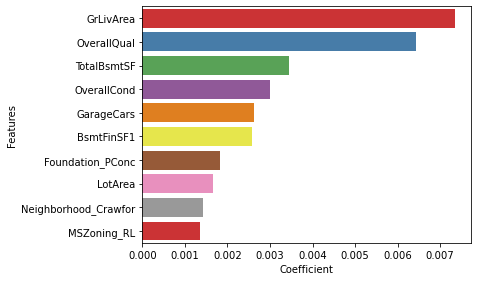

In [95]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

# Conclusion

In [ ]:
Hence based on analysis, the factors that generally affect the price are the Zoning classification, Living area square feet, Overall quality and condition of the house, Foundation type of the house, Number of cars that can be accomodated in the garage, Total basement area in square feet and the Basement finished square feet area

Therefore, the variables predicted by lasso  in the above bar chart as significant variables for predicting the price of a house.